In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Collecting Data

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.sample(10)

,Unnamed: 0,TV,radio,newspaper,sales
56,57,7.3,28.1,41.4,5.5
81,82,239.8,4.1,36.9,12.3
160,161,172.5,18.1,30.7,14.4
61,62,261.3,42.7,54.7,24.2
75,76,16.9,43.7,89.4,8.7
35,36,290.7,4.1,8.5,12.8
21,22,237.4,5.1,23.5,12.5
133,134,219.8,33.5,45.1,19.6
126,127,7.8,38.9,50.6,6.6
156,157,93.9,43.5,50.5,15.3


checking the shape of the data

In [4]:
df.shape

# we have 200 records and 5 columns 

(200, 5)

In [6]:
#checking the null values 
df.info()
# as we can see there is no null values available in the dataset so we can move ahead with the EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
# we will drop off the unamed columns because it is irrelevant for our dataset

df = df.drop(columns = 'Unnamed: 0')

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


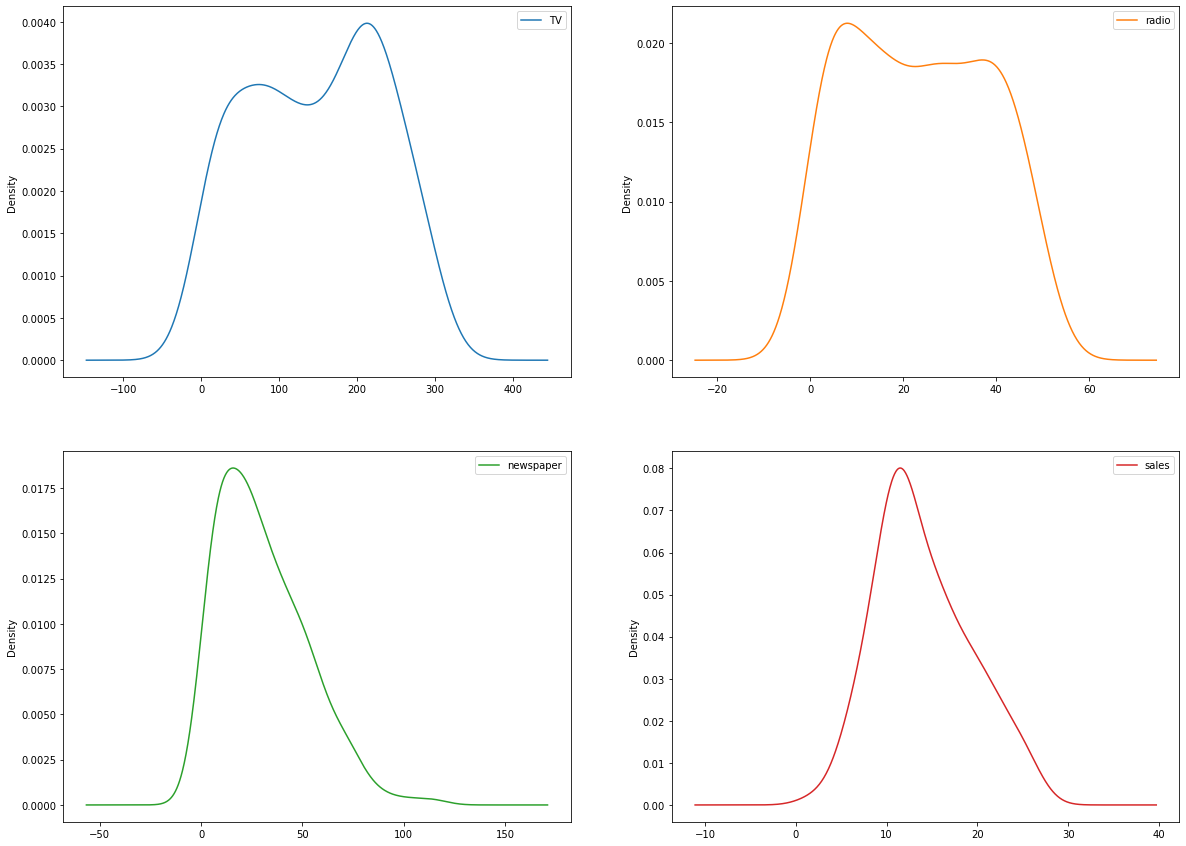

In [16]:
# lets check the distribution of the data

df.plot(kind='density',layout=(2,2),subplots=True,sharex=False,figsize=(20,15))
plt.show()

Data seems normally distributed however we can see little skewness for newspaper dat, we will further check it using .skew()

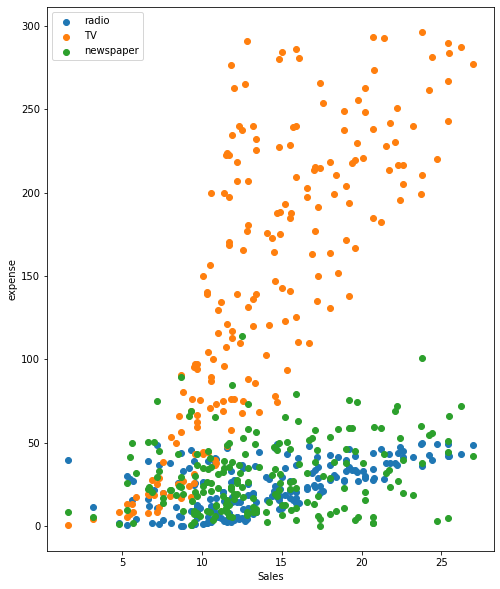

In [68]:
# checking the correaltion of features and label using scatter plot
plt.figure(figsize=(8,10))
plt.scatter(x='sales',y='radio',data=df)
plt.scatter(x='sales',y='TV',data=df)
plt.scatter(x='sales',y='newspaper',data=df)
plt.xlabel('Sales')
plt.ylabel('expense')
plt.legend()

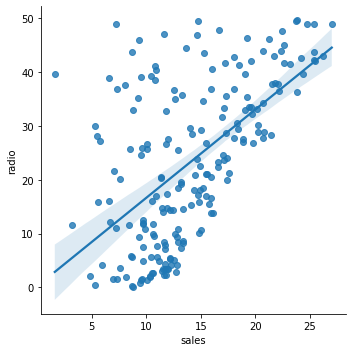

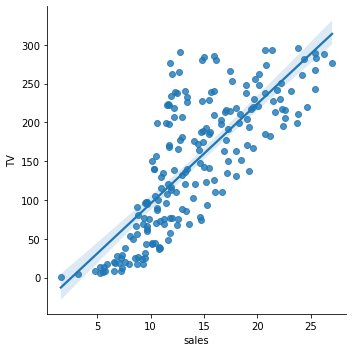

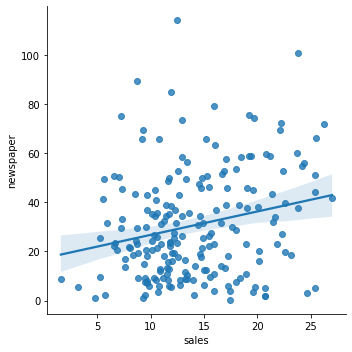

In [74]:
#check the best ft line using lmplot
sns.lmplot(x='sales',y='radio',data=df)
sns.lmplot(x='sales',y='TV',data=df)
sns.lmplot(x='sales',y='newspaper',data=df)
plt.show()

based on the scatterplot and lm plot it is visible that TV and radio is contributing more in terms of generating sales as compared to newspaper

<AxesSubplot:>

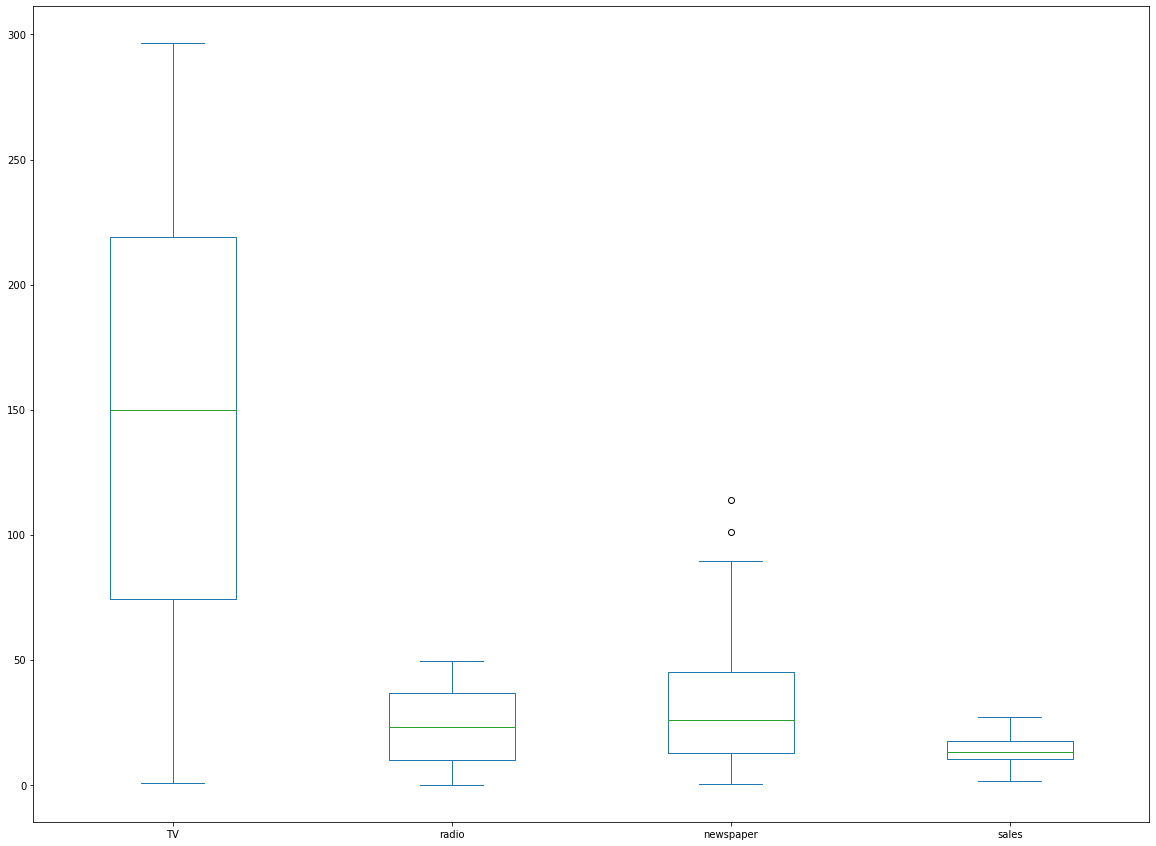

In [88]:
# checking for outliers
df.plot(kind='box',figsize=(20,15))
# we can find few outliers in the newspaper columns 

Removing outliers from the data using zscore

In [101]:
from scipy.stats import zscore

z_score = np.abs(zscore(df['newspaper']))

df = df[z_score<3]

df

# 2 outliers has been removed

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


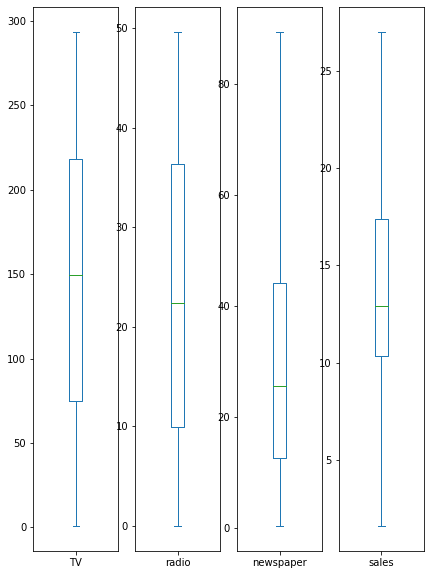

In [116]:
# vizulaizing it using box plot

df.plot(kind='box',sharex=False,subplots=True,figsize=(7,10))
plt.show()

# no outlier can be seen

Dividing the data into features and label

In [117]:
x = df.drop(columns ='sales')
y = df['sales']

<AxesSubplot:>

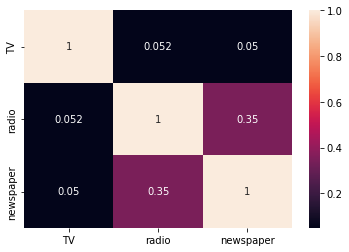

In [122]:
# checking for the multicolinearity

sns.heatmap(x.corr(),annot=True)

# no sign of multicolinearity

In [126]:
# checking the relationship between features and label

x.corrwith(y)

# as we can see the expenditure in TV is highly correlated with the sales

TV           0.779121
radio        0.576748
newspaper    0.219555
dtype: float64

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

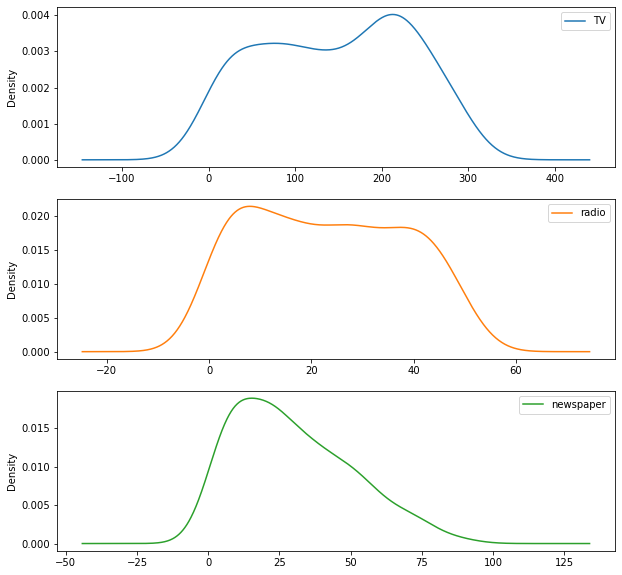

In [136]:
# checking the skewness of data using distribution plot

x.plot(kind='density',subplots=True,sharex=False,figsize=(10,10))

# we can see little skewness in newspaper columns

In [137]:
x.skew()

#we can see little skewness in 2 columns so we will remove it using power transforms

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

In [143]:
from sklearn.preprocessing import power_transform

x_trans = power_transform(x)

x_trans = pd.DataFrame(x_trans,columns=x.columns)

x_trans.skew()

TV          -0.320682
radio       -0.236668
newspaper   -0.101288
dtype: float64

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

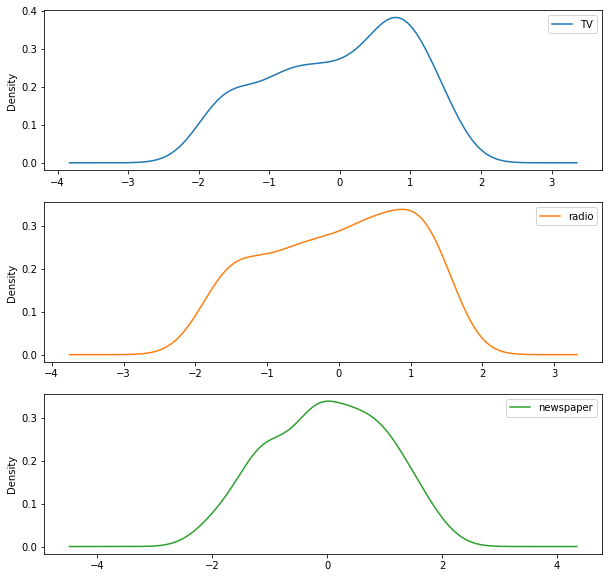

In [146]:
x_trans.plot(kind='density',subplots=True,sharex=False,figsize=(10,10))

#skewness has been removed

### Training the model

We will use 4 regression model to predict the data

    - linear regression
    - xgboost
    - decisiontree regressor
    - Random forest regressor

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
# best the best random state for linear regrssion model
ri = 0
mae = 10
score = 0

for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x_trans,y,train_size=.8,random_state=i)
    lm = LinearRegression()
    lm.fit(x_train,y_train)
    y_pred = lm.predict(x_test)
    pri = i
    pmae = mean_absolute_error(y_test,y_pred)
    pscore = lm.score(x_test,y_test)
    
    if mae > pmae:
        mae = pmae
        ri = pri
        score = pscore
print('mean absolute error - ',mae,'\n','random state -',ri,'\n','Score --',pscore)

mean absolute error -  0.906855291658473 
 random state - 35 
 Score -- 0.8951349006486846


In [191]:
#finding the best random state for decision tree regressor
from sklearn.tree import DecisionTreeRegressor

ri = 0
mae = 10
score = 0

for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x_trans,y,train_size=.8,random_state=i)
    dt = DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    pri = i
    pmae = mean_absolute_error(y_test,y_pred)
    pscore = dt.score(x_test,y_test)
    
    if mae > pmae:
        mae = pmae
        ri = pri
        score = pscore
print('mean absolute error - ',mae,'\n','random state -',ri,'\n','Score --',pscore)

mean absolute error -  0.605 
 random state - 198 
 Score -- 0.9544629353137362


In [192]:
#finding the best random state for random forest regressor regressor
from sklearn.ensemble import RandomForestRegressor

ri = 0
mae = 10
score = 0

for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x_trans,y,train_size=.8,random_state=i)
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    pri = i
    pmae = mean_absolute_error(y_test,y_pred)
    pscore = rf.score(x_test,y_test)
    
    if mae > pmae:
        mae = pmae
        ri = pri
        score = pscore
print('mean absolute error - ',mae,'\n','random state -',ri,'\n','Score --',pscore)

mean absolute error -  0.414974999999998 
 random state - 50 
 Score -- 0.9738581752210502


In [202]:
import xgboost as xgb

xgb1 = xgb.XGBRegressor()

In [219]:
import xgboost as xgb


ri = 0
mae = 10
score = 0

for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x_trans,y,train_size=.8,random_state=i)
    xgb1.fit(x_train,y_train)
    y_pred = xgb1.predict(x_test)
    pri = i
    pmae = mean_absolute_error(y_test,y_pred)
    pscore = xgb1.score(x_test,y_test)
    
    if mae > pmae:
        mae = pmae
        ri = pri
        score = pscore
print('mean absolute error - ',mae,'\n','random state -',ri,'\n','Score --',pscore)

mean absolute error -  0.45439117431640624 
 random state - 69 
 Score -- 0.9740309098812849


In [220]:
# as we are getting better result from xgboost we will use this to predict our model

x_train, x_test, y_train, y_test = train_test_split(x_trans,y,train_size=.8,random_state=69)
xgb1.fit(x_train,y_train)
y_pred = xgb1.predict(x_test)
xgb1.score(x_test,y_test)

0.987366524048198

### Model Evaulation

<AxesSubplot:xlabel='sales'>

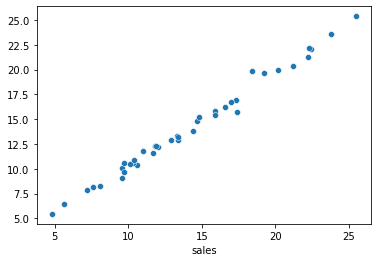

In [221]:
# comparing the predicted result with actual result using scatterplot
sns.scatterplot(x=y_test,y=y_pred)

In [222]:

from sklearn.metrics import r2_score

print('mean absolute error --',mean_absolute_error(y_test,y_pred))
print('mean Squared error --',mean_squared_error(y_test,y_pred))
print('R2 Score --',r2_score(y_test,y_pred))

mean absolute error -- 0.45439117431640624
mean Squared error -- 0.3329836050714089
R2 Score -- 0.987366524048198


#### Hyper Parameter tuning

In [224]:
from sklearn.model_selection import GridSearchCV

In [235]:

param = {'max_depth': range(1,5),'max_leaves': range(1,5),'min_child_weight': range(1,5)}

grd = GridSearchCV(xgb1, param_grid=param)

grd.fit(x_train, y_train)

print(grd.best_params_)

{'max_depth': 4, 'max_leaves': 1, 'min_child_weight': 1}


In [238]:
xgb1 = grd.best_estimator_
xgb1.fit(x_train,y_train)
y_pred = xgb1.predict(x_test)
xgb1.score(x_test,y_test)

0.9870007427736326